In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from sklearn.datasets import make_regression

In [45]:
X, y = make_regression(n_samples=500, n_features=1, bias = 4.2, noise=12)

In [46]:
print(X.shape)
print(y.shape)

(500, 1)
(500,)


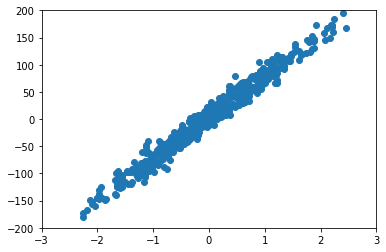

In [47]:
plt.xlim(-3, 3)
plt.ylim(-200, 200)
plt.scatter(X, y)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y)

In [50]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(375, 1) (375,)
(125, 1) (125,)


In [51]:
def hypothesis(x, W):
    x0 = 1
    x1 = x
    h = W[0]*x0 + W[1]*x1
    return h

In [56]:
def error(X, W, y):
    err = 0.0
    m = X.shape[0]
    for i in range(m):
        h = hypothesis(X[i], W)
        err += (h - y[i])**2
    err /= 2*m
    return err

In [57]:
def gradient_descent(X, W, y, learning_rate = 0.1):
    m = X.shape[0]
    grad0 = 0.0
    grad1 = 0.0
    for i in range(m):
        grad1 += (y[i] - hypothesis(X[i], W)) * X[i]
        grad0 += y[i] - hypothesis(X[i], W)
    grad1 /= m
    grad0 /= m
    W[1] += learning_rate*grad1
    W[0] += learning_rate*grad0
    err = error(X, W, y)
    return W, err

In [58]:
W = np.array([0.5, 0.5])
error_list = []
for i in range(400):
    W, err = gradient_descent(xtrain, W, ytrain)
    error_list.append(err)
print(W)

[ 4.40783322 75.65615694]


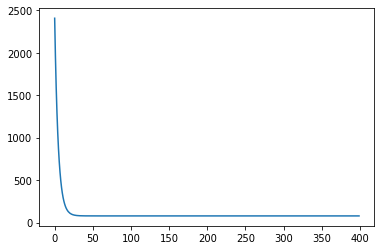

In [59]:
plt.plot(error_list)
plt.show()

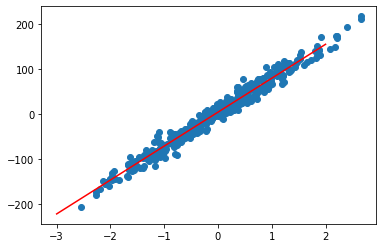

In [61]:
plt.scatter(xtrain, ytrain)

X = np.arange(-3, 3)
Y = W[0] + W[1]*X
plt.plot(X, Y, c='r')

plt.show()

In [67]:
def stochastic_gd(X, W, y, learning_rate = 0.1):
    m = X.shape[0]
    loss = []
    for i in range(m):
        grad1 = (y[i] - hypothesis(X[i], W)) * X[i]
        grad0 = y[i] - hypothesis(X[i], W)
        W[1] += learning_rate*grad1
        W[0] += learning_rate*grad0
        err = error(X, W, y)
        loss.append(err)
    return W, loss

In [68]:
W = np.array([0.5, 0.5])
W, loss = stochastic_gd(xtrain, W, ytrain)
print(W)

[ 1.50286042 71.17225542]


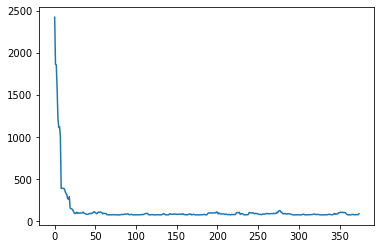

In [69]:
plt.plot(loss)
plt.show()

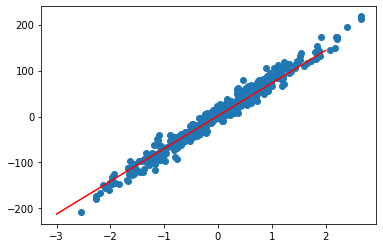

In [70]:
plt.scatter(xtrain, ytrain)

X = np.arange(-3, 3)
Y = W[0] + W[1]*X
plt.plot(X, Y, c='r')

plt.show()